In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [3]:
# limit the steering angle range
MAX_STEERING_ANGLE = np.deg2rad(60)

In [4]:
def simulate(state, angle, v, dt):
    x = state[0]
    y = state[1]
    theta = state[2]    
    
    nx = x + v*np.cos(theta)*dt
    ny = y + v*np.sin(theta)*dt
    ntheta = theta + v*np.tan(angle)*dt
    
    return [nx, ny, ntheta]

In [13]:
dt = 1
T = 4

start = [0, 0, 0]
goal = [10, 5, 0]

# angles = [steer(start, goal) for _ in range(100)]
lines = []

for _ in range(10000):
    line = [start]
    state = np.copy(start)
    v = np.random.uniform(0, 1)
    # v = 1
    for _ in np.arange(0, T, dt):
        angle = np.random.uniform(-MAX_STEERING_ANGLE, MAX_STEERING_ANGLE)
        # angle = np.random.normal(0, MAX_STEERING_ANGLE)
        state = simulate(state, angle, v, dt)
        line.append(state)
    lines.append(line)
    
lines = np.array(lines)
print(lines.shape)

(10000, 5, 3)


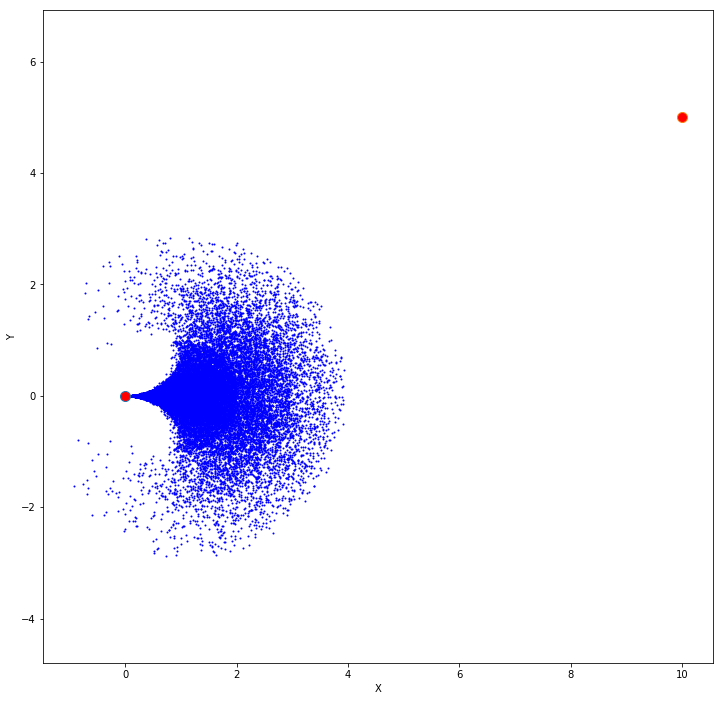

In [14]:
for i in range(lines.shape[0]):
    plt.scatter(lines[i, :, 0], lines[i, :, 1], c='b', s=1)
plt.plot(start[0], start[1], 'o', mfc='r', ms=10)
plt.plot(goal[0], goal[1], 'o', mfc='r', ms=10)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()